In [1]:
#import needed liberaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the data from the location on pc
global_store = pd.read_csv(r'C:\Users\agozi\Desktop\DATA\global_superstore.CSV', encoding='latin-1')
#added encoding='latin-1' to get rid of any encoding error
print(global_store[:0])

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Postal Code, City, State, Country, Region, Market, Product ID, Product Name, Sub-Category, Category, Sales, Quantity, Discount, Profit, Shipping Cost, Order Priority]
Index: []

[0 rows x 24 columns]


In [3]:
#convert the csv file to data frame
df = pd.DataFrame(global_store)
df[:1]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,3/22/2017,3/29/2017,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium


In [4]:
#checking for null values which could be an issue 
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41292
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Product Name          0
Sub-Category          0
Category              0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [1]:
#since we dont need postal code for this analysis, we will delete out the whole column
df.drop('Postal Code', axis=1, inplace=True)

NameError: name 'df' is not defined

In [6]:
#check to comfrim if the colum was dropped 
df[:0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


In [10]:
# change the whole Order Date to the same date format to take care of Date error and correct all noticed error
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'] = df['Order Date'].apply(lambda x: x.replace(year=2022, day=1))
df['Order Date'] = df['Order Date'].dt.strftime('%Y-%m-%d')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d')

In [11]:
#input the revenue column and perform the necessary calculations to fill the revenure column 
#with the need data which in our case is Revenue for each product sold
from datetime import datetime
df['Revenue'] = df['Sales'].mul(df['Quantity']) + df['Shipping Cost'] - df['Discount']
#inserted total sales to by adding sales and quanity sold
df['Total Sales'] = df['Sales'].mul(df['Quantity'])

In [12]:
#first convert to the same data type
df["Sales"].astype(float)
df["Discount"].astype(float)
df["Quantity"].astype(float)

0        2.0
1        9.0
2        3.0
3        4.0
4        4.0
        ... 
51281    2.0
51282    1.0
51283    1.0
51284    2.0
51285    1.0
Name: Quantity, Length: 51286, dtype: float64

In [13]:
#print out some data from your data frame to see if it worked properly 
df[:2]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Revenue,Total Sales
0,24599,IN-2017-CA120551-42816,2022-03-01,3/29/2017,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,...,Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium,1503.30,1463.64
1,29465,ID-2015-BD116051-42248,2022-09-01,09/04/2015,Second Class,BD-116051,Brian Dahlen,Consumer,Herat,Hirat,...,Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium,2210.58,2191.86


[Text(0, 20000000.0, '20m'),
 Text(0, 21000000.0, '21m'),
 Text(0, 22000000.0, '22m'),
 Text(0, 23000000.0, '23m'),
 Text(0, 24000000.0, '24m')]

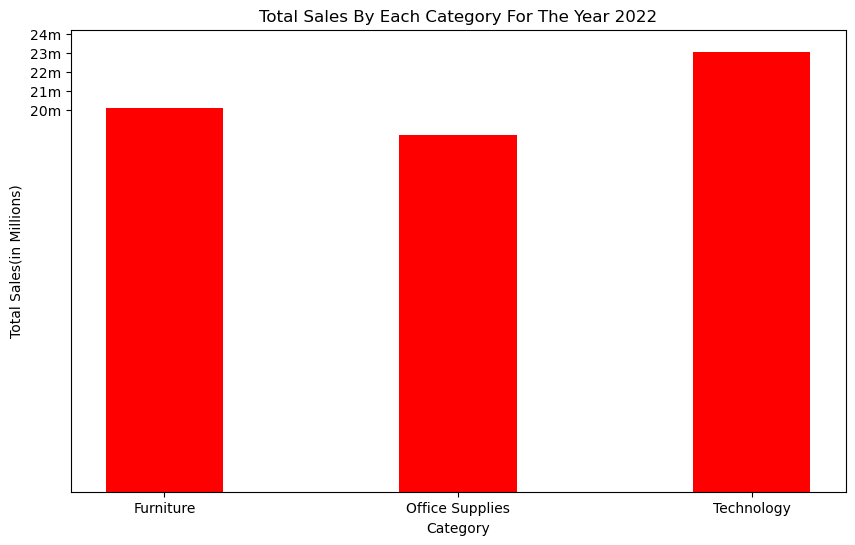

In [14]:
# to plot the category againt revenue, we have to group all data into the categoty they fall under
cat_rev = pd.DataFrame(df.groupby("Category") ["Total Sales"].sum())
#plot a bar chat with the data frame
#used plt.figure to size the graph where 10= width and 6=hight
plt.figure(figsize=(10, 6))
plt.bar(cat_rev.index, cat_rev["Total Sales"], width=0.4, color='red')
# label the axis
plt.title("Total Sales By Each Category For The Year 2022")
plt.xlabel("Category")
plt.ylabel("Total Sales(in Millions)")
# Setting custom labels for y-axis
#the value +10000000, 10000000 is used to set the limit to increase by 1M
yticks = np.arange(20000000, cat_rev["Total Sales"].max()+1000000, 1000000)
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels(["{:,.0f}m".format(x/1000000) for x in yticks])


In [15]:
# lets then look at how each category of the store performed over the year by seeing how they trend with time(monthly)

In [16]:
#This code first groups the data by both the "Order Date" and "Category" columns, then resets the index to ensure 
#that the resulting DataFrame has a proper index.
#Next, it filters the data to only include rows where the "Category" column is equal to "Office Supplies". 
#Finally, it groups the data by the "Order Date" column and sums the values in the "Sales" column.
cat_sales = pd.DataFrame(df.groupby(["Order Date", "Category"]).sum()).reset_index()
cat_sales = cat_sales[cat_sales["Category"] == "Office Supplies"]
cat_sales = cat_sales.groupby("Order Date")["Total Sales"].sum()
cat_sales = pd.DataFrame(cat_sales)
#round off to a two decimal palce to make it easier to understand
cat_sales["Total Sales"] = cat_sales["Total Sales"].round(2)
print(cat_sales)


            Total Sales
Order Date             
2022-01-01   1155828.87
2022-02-01    782267.37
2022-03-01   1050727.73
2022-04-01   1074319.74
2022-05-01   1375670.53
2022-06-01   1874369.07
2022-07-01   1140094.88
2022-08-01   1976534.52
2022-09-01   2122148.73
2022-10-01   1471886.05
2022-11-01   2308486.33
2022-12-01   2354894.81


<Figure size 10000x5000 with 0 Axes>

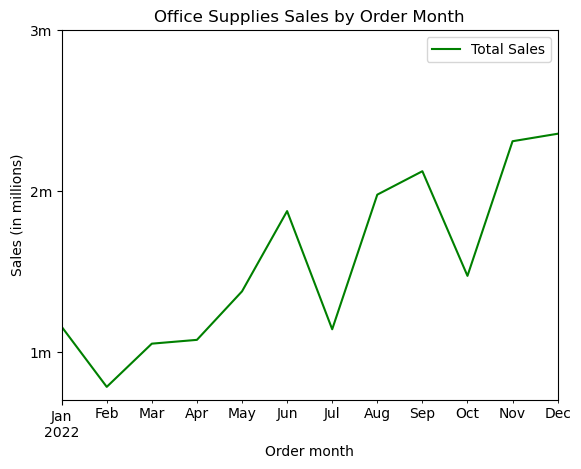

In [20]:
#here we plot a line chart of office supplies  
plt.figure(figsize=(100, 50))
cat_sales.plot(kind='line', color='green')
plt.xlabel("Order month")
plt.ylabel("Sales (in millions)")
plt.title("Office Supplies Sales by Order Month")
#formart the sales axis to accomodate millions
yticks = np.arange(1000000, cat_sales["Total Sales"].max()+1000000, 1000000)
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels(["{:,.0f}m".format(x/1000000) for x in yticks])
plt.show()


In [21]:
#to see how sales of technology trends over the year
cat_sales_tech = pd.DataFrame(df.groupby(["Order Date", "Category"]).sum()).reset_index()
cat_sales_tech = cat_sales_tech[cat_sales_tech["Category"] == "Technology"]
cat_sales_tech = cat_sales_tech.groupby("Order Date")["Total Sales"].sum()
cat_sales_tech = pd.DataFrame(cat_sales_tech)
cat_sales_tech = cat_sales_tech.round(2)
print(cat_sales_tech)

            Total Sales
Order Date             
2022-01-01   1038203.93
2022-02-01   1014825.37
2022-03-01   1407918.45
2022-04-01   1232560.45
2022-05-01   1732748.23
2022-06-01   2298942.59
2022-07-01   1385204.14
2022-08-01   2456252.02
2022-09-01   2493143.26
2022-10-01   2490746.57
2022-11-01   2660741.06
2022-12-01   2835208.81


<Figure size 10000x5000 with 0 Axes>

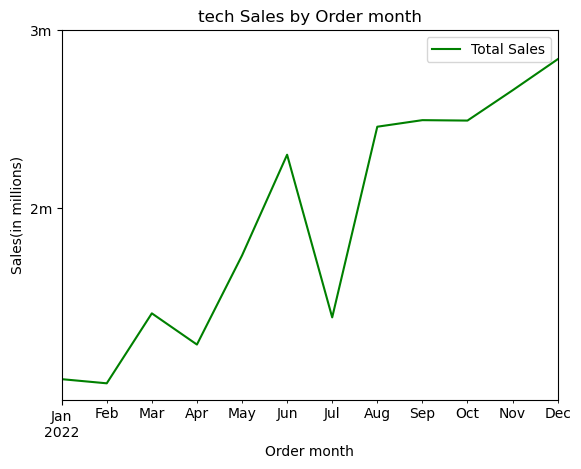

In [22]:
#now lets represent the sales of technology products over time on a line chart
plt.figure(figsize=(100, 50))
cat_sales_tech.plot(kind='line', color='green')
plt.xlabel("Order month")
plt.ylabel("Sales(in millions)")
plt.title("tech Sales by Order month")
#format the sales axis 
yticks = np.arange(2000000, cat_sales_tech["Total Sales"].max()+1000000, 1000000)
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels(["{:,.0f}m".format(x/1000000) for x in yticks])
plt.show()

In [23]:
#to see how sales of furnitue trends over the year
cat_sales_fun = pd.DataFrame(df.groupby(["Order Date", "Category"]).sum()).reset_index()
cat_sales_fun = cat_sales_fun[cat_sales_fun["Category"] == "Furniture"]
cat_sales_fun = cat_sales_fun.groupby("Order Date")["Total Sales"].sum()
cat_sales_fun = pd.DataFrame(cat_sales_fun)
cat_sales_fun = cat_sales_fun.round(2)
print(cat_sales_fun)

            Total Sales
Order Date             
2022-01-01   1217688.92
2022-02-01    966091.63
2022-03-01   1259930.03
2022-04-01   1001257.57
2022-05-01   1310603.15
2022-06-01   1914767.78
2022-07-01   1062542.65
2022-08-01   1957883.71
2022-09-01   2377173.59
2022-10-01   1820957.05
2022-11-01   2548006.11
2022-12-01   2649195.78


[Text(0, 2000000.0, '2m'), Text(0, 3000000.0, '3m')]

<Figure size 10000x5000 with 0 Axes>

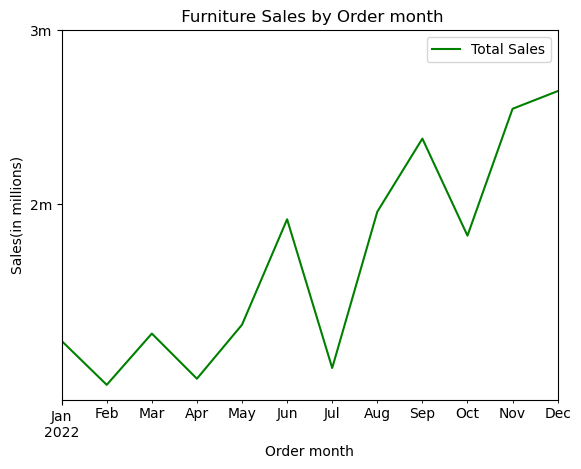

In [24]:
#now lets represent the sales of funiture products over time on a line chart
plt.figure(figsize=(100, 50))
cat_sales_fun.plot(kind='line', color='green')
plt.xlabel("Order month")
plt.ylabel("Sales(in millions)")
plt.title(" Furniture Sales by Order month")
# format sales in millions 
yticks = np.arange(2000000, cat_sales_fun["Total Sales"].max()+1000000, 1000000)
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels(["{:,.0f}m".format(x/1000000) for x in yticks])

In [25]:
#now lets see the over all sales trend for the year
sales_month = pd.DataFrame(df.groupby("Order Date") ["Total Sales"].sum())
sales_month = sales_month.round(2)
sales_month

,Total Sales
Order Date,
2022-01-01,3411721.72
2022-02-01,2763184.36
2022-03-01,3718576.21
2022-04-01,3308137.76
2022-05-01,4419021.91
2022-06-01,6088079.44
2022-07-01,3587841.68
2022-08-01,6390670.24
2022-09-01,6992465.58


[Text(0, 2000000.0, '2m'),
 Text(0, 3000000.0, '3m'),
 Text(0, 4000000.0, '4m'),
 Text(0, 5000000.0, '5m'),
 Text(0, 6000000.0, '6m'),
 Text(0, 7000000.0, '7m'),
 Text(0, 8000000.0, '8m')]

<Figure size 10000x5000 with 0 Axes>

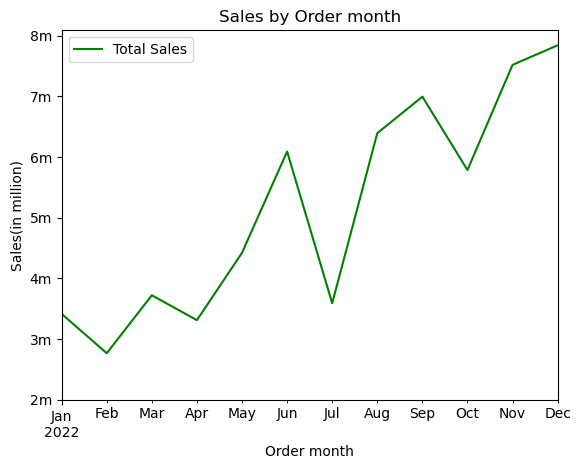

In [26]:
# lets now represent it in a line chart to see how it trends over the month
plt.figure(figsize=(100, 50))
sales_month.plot(kind='line', color='green')
plt.xlabel("Order month")
plt.ylabel("Sales(in million)")
plt.title("Sales by Order month")
# Setting custom labels for y-axis
#the value +10000000, 10000000 is used to set the limit to increase by 1M
yticks = np.arange(2000000, sales_month["Total Sales"].max()+1000000, 1000000)
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels(["{:,.0f}m".format(x/1000000) for x in yticks])

In [27]:
# the next task is to forcast the sales for the next business year
# to do this we have to rearrange our Order date to show 1st is the day and the group it to have the sales for each month

In [28]:
# lets call up our time series data....had to create a different variable not to tamper with the main dataframe
time_dc = df[[ "Order Date", "Total Sales"]]
time_dc[:4]

,Order Date,Total Sales
0,2022-03-01,1463.64
1,2022-09-01,2191.86
2,2022-03-01,1038.96
3,2022-03-01,678.72


In [29]:
# group the order date to sum up the sales for each month
time_series_1 = pd.DataFrame(time_dc.groupby("Order Date") ["Total Sales"].sum().reset_index())
#noticed some error as a result of the data type after i wanted to round to a 2 decimal place. so used the code below to change the data type
time_series_1["Total Sales"] = time_series_1["Total Sales"].astype(float)
#round off to a two decimal palce to make it easier to understand
time_series_1["Total Sales"] = time_series_1["Total Sales"].round(2)
print(time_series_1)

   Order Date  Total Sales
0  2022-01-01   3411721.72
1  2022-02-01   2763184.36
2  2022-03-01   3718576.21
3  2022-04-01   3308137.76
4  2022-05-01   4419021.91
5  2022-06-01   6088079.44
6  2022-07-01   3587841.68
7  2022-08-01   6390670.24
8  2022-09-01   6992465.58
9  2022-10-01   5783589.67
10 2022-11-01   7517233.50
11 2022-12-01   7839299.39


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'

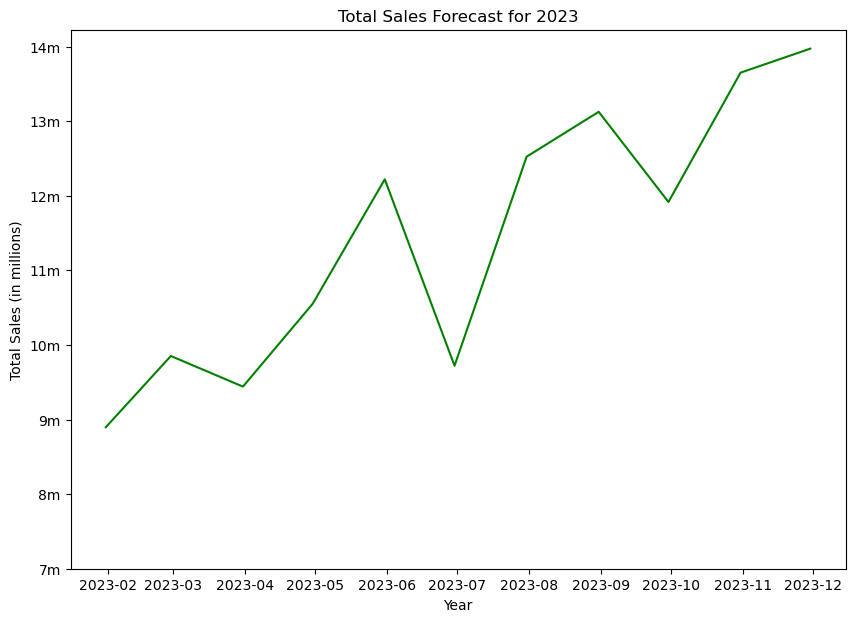

In [30]:
# calculate the forecast
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.DataFrame(time_series_1)

# Convert the Order Date column to a datetime index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.set_index('Order Date')

# Fit the SARIMA model
model = SARIMAX(df['Total Sales'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit()

# Make the forecasts
forecast = model_fit.predict(start='2022-02-01', end='2023-12-01', dynamic=False)

# Create a new dataframe with the forecast
df_forecast = pd.DataFrame(data={"Total Sales": forecast})
df_forecast.index = pd.date_range(start='2022-01-01', end='2023-12-01', freq='M')
df_forecast = df_forecast[df_forecast.index.year == 2023]

# Plot the forecast
plt.figure(figsize=(10, 7))
plt.plot(df_forecast['Total Sales'], label='Total Sales Forecast', color='green')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales Forecast for 2023')
yticks = np.arange(7000000, df_forecast["Total Sales"].max()+1000000, 1000000)
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels(["{:,.0f}m".format(x/1000000) for x in yticks])
plt.show()